# HSE 2023: Введение в машинное обучение БИ 22/23

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет по ценам бриллиантов из seaborn

In [10]:
data = sns.load_dataset('diamonds')

y = data.price
x = data.drop(['price'], axis=1)
columns = data.drop(['price'], axis=1).columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [12]:
data.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки

In [13]:
encoder = LabelEncoder()
x['cut'] = encoder.fit_transform(x['cut'])
x['color'] = encoder.fit_transform(x['color'])
x['clarity'] = encoder.fit_transform(x['clarity'])

In [14]:
x.head(15)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,3.95,3.98,2.47
7,0.26,4,4,2,61.9,55.0,4.07,4.11,2.53
8,0.22,0,1,5,65.1,61.0,3.87,3.78,2.49
9,0.23,4,4,4,59.4,61.0,4.00,4.05,2.39


In [15]:
y.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

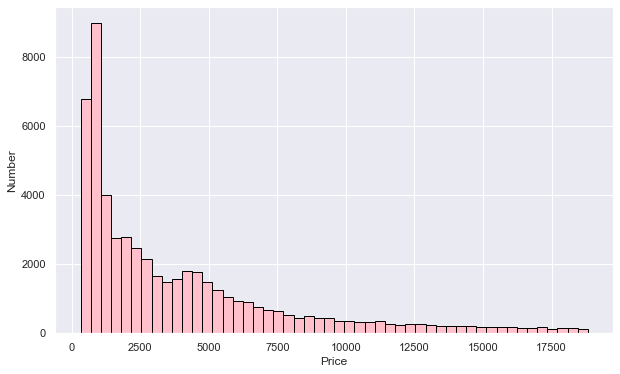

In [16]:
plt.figure(figsize=(10,6))
plt.hist(y, bins=50, ec='black', color='pink')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

In [17]:
y_log = np.log(y)

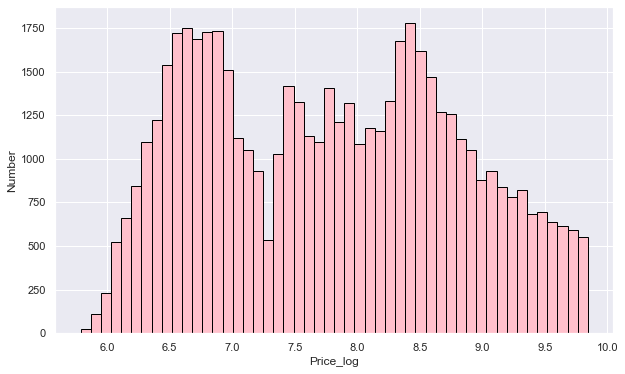

In [18]:
plt.figure(figsize=(10,6))
plt.hist(y_log, bins=50, ec='black', color='pink')
plt.xlabel('Price_log')
plt.ylabel('Number')
plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)

print('training r-squared', model.score(x_train_scaled, y_train))
print('test r-squared', model.score(x_test_scaled, y_test))
print('intercept', model.intercept_)

training r-squared 0.885326091785287
test r-squared 0.883996326954483
intercept 3928.6812893956258


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.2, random_state=17)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)

print('training r-squared', model.score(x_train_scaled, y_train))
print('test r-squared', model.score(x_test_scaled, y_test))
print('intercept', model.intercept_)

training r-squared 0.9487836808333271
test r-squared 0.9329898596237695
intercept 7.785915215637183


#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 80:20 и random_state=17. 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.2, random_state=17)

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### 2. [1 балл] Обучите модели на train'е используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.6$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей! 

In [23]:
# Обучение модели LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

# Обучение модели Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)

# Обучение модели Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)

# Обучение модели ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.6)
elastic.fit(x_train_scaled, y_train)
y_pred_elastic = elastic.predict(x_test_scaled)

# Обучение модели StatsModels
x_train_scaled = sm.add_constant(x_train_scaled)

model_sm = sm.OLS(y_train, x_train_scaled)
results_sm = model_sm.fit()

x_test_scaled = sm.add_constant(x_test_scaled)

y_pred_sm = results_sm.predict(x_test_scaled)

In [24]:
print("LinearRegression")
print(f"R2: {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False):.4f}\n")

print("Ridge")
print(f"R2: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_ridge, squared=False):.4f}\n")

print("Lasso")
print(f"R2: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lasso, squared=False):.4f}\n")

print("ElasticNet")
print(f"R2: {r2_score(y_test, y_pred_elastic):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_elastic, squared=False):.4f}\n")

print("OLS")
print(f"R2: {r2_score(y_test, y_pred_sm):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_sm, squared=False):.4f}")

LinearRegression
R2: 0.9330
RMSE: 0.2625

Ridge
R2: 0.9330
RMSE: 0.2625

Lasso
R2: 0.9341
RMSE: 0.2604

ElasticNet
R2: 0.9342
RMSE: 0.2601

OLS
R2: 0.9330
RMSE: 0.2625


#### 3. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы 

In [25]:
lr_coef_df = pd.DataFrame(data=lr.coef_, index=x_train.columns, columns=['lr_coef'])
ridge_coef_df = pd.DataFrame(data=ridge.coef_, index=x_train.columns, columns=['ridge_coef'])
lasso_coef_df = pd.DataFrame(data=lasso.coef_, index=x_train.columns, columns=['lasso_coef'])
elastic_coef_df = pd.DataFrame(data=elastic.coef_, index=x_train.columns, columns=['elastic_coef'])

ols_coef = []
for i in range(len(results_sm.params)):
    ols_coef.append(results_sm.params[i])
sm_coef_df = pd.DataFrame(data=ols_coef[1:], index=x_train.columns, columns=['ols_coef'])

coef_df = pd.concat([lr_coef_df, ridge_coef_df, lasso_coef_df, elastic_coef_df, sm_coef_df], axis=1)
coef_df.loc['Intercept_'] = pd.Series([lr.intercept_, ridge.intercept_, lasso.intercept_, elastic.intercept_,
                                           ols_coef[0]], index=coef_df.columns)

In [26]:
coef_df

,lr_coef,ridge_coef,lasso_coef,elastic_coef,ols_coef
carat,-0.344168,-0.344160,-0.000000,-0.000000,-0.344168
cut,0.008717,0.008717,0.000000,0.000000,0.008717
color,-0.111587,-0.111588,-0.105390,-0.109874,-0.111587
clarity,0.110173,0.110173,0.093641,0.097649,0.110173
depth,0.049048,0.049047,0.017748,0.016217,0.049048
table,-0.017797,-0.017797,-0.010319,-0.012729,-0.017797
x,1.286335,1.286317,0.934596,0.837961,1.286335
y,0.052553,0.052558,0.033691,0.089769,0.052553
z,0.032344,0.032349,0.049684,0.096221,0.032344
Intercept_,7.785915,7.785915,7.785915,7.785915,7.785915


Для моделей Lasso и Elastic некоторые веса признаков стали равны нулю. Скорее всего это вызвано использованием регуляризации в моделях, которая штрафует большие веса признаков и уменьшает их важность.

Признак "carat", связанный с массой алмаза, имеет отрицательный коэффициент в моделях LR и Ridge, что говорит о том, что более крупные алмазы могут иметь меньшую ценность на рынке, однако в реальной жизни это не так. При всех прочих равных параметрах при увеличении значения карат, цена бриллианта возрастает. Такое значение в модели может быть вызвано большим количеством факторов, например тем, что в данном датасете большое количество бриллиантов с большим количеством карат, но некачественных по остальным критериям. Однако в данном случае разгадка кроется в другом. Стоить вспомнить что мы прологарифмировали данные по целевой переменной, тк они имели не очень удачное распределение, далекое от нормального. Этим вызвано появление подобного веса у параметра "carat". Также стоит учитывать что значения весов в данном случае показывают изменение именно процентного соотношения в целевой переменной

Признак "cut" имеет положительный коэффициент во моделях LR и Ridge, но он меньше, чем у других признаков, что говорит о том, что качество огранки алмаза тоже влияет на цену алмаза на рынке, но не так сильно, как остальные параметры.

Признак "color" имеет отрицательный коэффициент во всех моделях, что говорит о том, что более прозрачные алмазы имеют более высокую ценность на рынке.

Признак "clarity", связанный с оценкой чистоты алмаза, имеет положительный коэффициент во всех моделях, что говорит о том, что более чистые алмазы имеют более высокую ценность на рынке. Также стоит заметить, что веса "clarity" почти не отличаются между собой в разных моделях как и веса "color", что может говорить о том, что эти 2 параметра несут уникальную информацию в рамках датасета и скорее всего имеют слабу корреляцию с другими параметрами из датасета.

Признак "depth" имеет положительный коэффициент во всех моделях, что говорит о том, что алмазы с большей высотой камня от верхней грани имеют более высокую ценность.

Признак "table", связанный с шириной верхней грани алмаза, имеет отрицательный коэффициент во всех моделях, но его вес меньше, чем у других признаков, что говорит о том, что ширина верхней грани не имеет сильного влияния на цену алмаза.

Признаки "x", "y" и "z", связанные с размерами алмаза, имеют положительные коэффициенты во всех моделях, что говорит о том, что более крупные алмазы стоят больше, а сильнее всего из данных параметров на цену влияет горизонтальная длина алмаза "x".

Отдельно хочется обратить внимание на **абсолютную равнозначность** моделей LR и OLS, потому что это две одинаковые модели, просто при обучении модели OLS было необходимо вручную добавить столбец констант для нахождения свободного члена уравнения линейной регрессии)))

#### 4. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

In [19]:
def forward_selection(x, y, pvalue_level=0.05):
    features = list(x.columns)
    selected_features = []
    while len(features) > 0:
        remaining_features = list(set(features) - set(selected_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(x[selected_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_pval = new_pval.min()
        if min_pval < pvalue_level:
            selected_features.append(new_pval.idxmin())
        else:
            break
    return selected_features

In [20]:
np.random.seed(42)
selected_features = forward_selection(x, y)
print('Selected features:', selected_features)

Selected features: ['x', 'clarity', 'color', 'carat', 'depth', 'table', 'cut', 'y']


In [27]:
x['carat'].corr(x['x'])

0.9750942267264208

Какие тут можно сделать выводы? Максимально прозрачный алгоритм Forward Elimination, который можно использовать во первых для отбрасывания статистически не важных данных в конкретном датасете(например по значению p-value), а также для того, чтобы в какой-то степени упорядочить параметры по статистической значимости(опять же если судить по критерию p-value) в их комбинации друг с другом. Обычно Backward Elimination предпочтительнее, особенно если ведется работа с очень многомерными векторами данных. Но если необходимо сократить размерность данных, то предпочтительнее начать с использования таких методов, как например PCA.

В данном случае мы можем увидеть довольно ожидаемые результаты: наиболее статистически важные парметры это **x**, **clarity** и **color**. **carat** сразу же идет следом. Это может показаться странным, ведь на деле это ключевой параметр при оценке стоимости алмаза, но на самом деле все в порядке, тк **carat** очень сильно коррелирует со значением **x**, что неудивительно, тк вес алмаза в каратах напрямую зависит от его длины **x** в мм)

**depth**, **table** и **cut** также влияют на цену алмаза, но не так сильно как ключевые параметры **clarity** и **color**.

**y** из всех параметров датасета оказался наименее значимым, а **z** вообще не вошел в список фич, хотя в матрице весов они имеют большие значения чем например **depth** и **сut**, но это обусловлено тем, что *грубо говоря* **carat**, **x**, **y** и **z** несут в рамках датасета одну и ту же информацию.

**В целом** порядок параметров по значимости совпадает с тем, который мы могли бы составить опираясь на веса моделей.

#### 5. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидациб на 4 фолда. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

*кросс валидацию* при разбиении на 4 фолда я буду применять ко всей выборке **x**, а не только к тренировочной, потому что в данном случае по условию задания нам просто нужно подобрать наилучший гиперпараметр опираясь на результаты моделей протренированных на разных наборах фолдов и нет необходимости проводить повторную валидацию модели, показавшей лучший результат с использованием **x_train**(не надо делать "Final evaluation")

![A](https://yastatic.net/s3/ml-handbook/admin/8_3_715a0c2b1d.png)

In [28]:
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lasso_cv = LassoCV(alphas=np.logspace(-4, 3, 8), cv=4)
lasso_cv.fit(x_scaled, y_log)

print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.0001


In [29]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

alphas = np.logspace(-4, 3, num=100)

def best_alpha(kfold, x, y, interval):
    
    rmse_list = []
    
    for alpha in interval:
        rmse = 0
        for train_idx, test_idx in kfold.split(x):
            x_train, x_test = x[train_idx], x[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            model = Lasso(alpha=alpha)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            rmse += np.sqrt(np.mean((y_test - y_pred) ** 2))
        rmse /= kfold.get_n_splits(x) ##По условию задачи 4
        rmse_list.append(rmse)

    best_idx = np.argmin(rmse_list)
    
    return round(interval[best_idx], 4)

print("Best alpha:", best_alpha(kf, x_scaled, y_log, alphas))

Best alpha: 0.0001


## Градиентный спуск

#### 6. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [30]:
from sklearn.base import BaseEstimator

### RidgeRegression GradientDecent

In [31]:
class RidgeRegressionGD:
    def __init__(self, alpha=0.01, eta=0.01, max_iter=10000, tolerance=1e-6, random_state=42):
        self.alpha = alpha
        self.eta = eta
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.random_state = random_state
        self.w = None
        self.loss_history = []
        
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        rng = np.random.default_rng(self.random_state)
        self.w = rng.normal(size=X.shape[1])
        
        for i in range(self.max_iter):
            y_pred = np.dot(X, self.w)
            loss = self.calc_loss(X, y, y_pred)
            grad = self.calc_gradient(X, y, y_pred)
            self.w -= self.eta * grad
            self.loss_history.append(loss)
            
            if i > 0:
                diff = np.abs(self.w - prev_w)
                if np.linalg.norm(diff) < self.tolerance:
                    break
            
            prev_w = self.w.copy()
        
        return self
    
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.w)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        res = np.sum((y - y_pred) ** 2)
        tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (res / tot)
        return r2_score
    
    def calc_gradient(self, X, y, y_pred):
        return -2 * np.dot(X.T, y - y_pred) / len(y) + 2 * self.alpha * self.w
    
    def calc_loss(self, X, y, y_pred):
        return np.mean((y - y_pred) ** 2) + self.alpha * np.dot(self.w, self.w)

### RidgeRegression StochasticGradientDecent

In [32]:
class RidgeRegressionSGD:
    def __init__(self, alpha=0.01, eta=0.01, max_iter=10000, batch_size=32, tolerance=1e-6, random_state=42):
        self.alpha = alpha
        self.eta = eta
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.tolerance = tolerance
        self.random_state = random_state
        self.w = None
        self.loss_history = []
        
    def fit(self, X, y):
        
        X = pd.DataFrame(X, index=y.index)
        y = y.reset_index(drop=True)
        
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        rng = np.random.default_rng(self.random_state)
        self.w = rng.normal(size=X.shape[1])
        
        for i in range(self.max_iter):
            batch_idx = rng.choice(len(y), size=self.batch_size, replace=False)
            X_batch, y_batch = X[batch_idx], y[batch_idx]
            y_pred = np.dot(X_batch, self.w)
            loss = self.calc_loss(X_batch, y_batch, y_pred)
            grad = self.calc_gradient(X_batch, y_batch, y_pred)
            self.w -= self.eta * grad
            self.loss_history.append(loss)
            
            if i > 0:
                diff = np.abs(self.w - prev_w)
                if np.linalg.norm(diff) < self.tolerance:
                    break
            
            prev_w = self.w.copy()
        
        return self
    
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.w)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        res = np.sum((y - y_pred) ** 2)
        tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (res / tot)
        return r2_score
    
    def calc_gradient(self, X, y, y_pred):
        return -2 * np.dot(X.T, y - y_pred) / len(y) + 2 * self.alpha * self.w
    
    def calc_loss(self, X, y, y_pred):
        return np.mean((y - y_pred) ** 2) + self.alpha * np.dot(self.w, self.w)

### RidgeRegression Momentum method

In [33]:
class RidgeRegressionM:
    def __init__(self, alpha=0.01, eta=0.01, momentum=0.9, max_iter=10000, tolerance=1e-6, random_state=42):
        self.alpha = alpha
        self.eta = eta
        self.momentum = momentum
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.random_state = random_state
        self.w = None
        self.loss_history = []
        self.v = None
        
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        rng = np.random.default_rng(self.random_state)
        self.w = rng.normal(size=X.shape[1])
        self.v = np.zeros(X.shape[1])
        
        for i in range(self.max_iter):
            y_pred = np.dot(X, self.w)
            loss = self.calc_loss(X, y, y_pred)
            grad = self.calc_gradient(X, y, y_pred)
            self.v = self.momentum * self.v + self.eta * grad
            self.w -= self.v
            self.loss_history.append(loss)
            
            if i > 0:
                diff = np.abs(self.w - prev_w)
                if np.linalg.norm(diff) < self.tolerance:
                    break
            
            prev_w = self.w.copy()
        
        return self
    
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.w)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        res = np.sum((y - y_pred) ** 2)
        tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (res / tot)
        return r2_score
    
    def calc_gradient(self, X, y, y_pred):
        return -2 * np.dot(X.T, y - y_pred) / len(y) + 2 * self.alpha * self.w
    
    def calc_loss(self, X, y, y_pred):
        return np.mean((y - y_pred) ** 2) + self.alpha * np.dot(self.w, self.w)

### RidgeRegression AdaptiveGradientDescent

In [34]:
class RidgeRegressionA:
    def __init__(self, alpha=1e-3, eta=1e-2, max_iter=1000, tolerance=1e-4, random_state=42):
        self.alpha = alpha
        self.eta = eta
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.random_state = random_state
        self.w = None
        self.loss_history = []
        self.G = 0
        
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        rng = np.random.default_rng(self.random_state)
        self.w = rng.normal(size=X.shape[1])
        self.G = np.zeros(X.shape[1])
        
        for i in range(self.max_iter):
            y_pred = np.dot(X, self.w)
            loss = self.calc_loss(X, y, y_pred)
            grad = self.calc_gradient(X, y, y_pred)  
            self.G += grad**2
            
            self.w -= self.eta / (np.sqrt(self.G) + 1e-8) * grad
            self.loss_history.append(loss)
            
            if i > 0:
                diff = np.abs(self.w - prev_w)
                if np.linalg.norm(diff) < self.tolerance:
                    break
            
            prev_w = self.w.copy()
        
        return self
    
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.w)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        res = np.sum((y - y_pred) ** 2)
        tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (res / tot)
        return r2_score
    
    def calc_gradient(self, X, y, y_pred):
        return -2 * np.dot(X.T, y - y_pred) / len(y) + 2 * self.alpha * self.w
    
    def calc_loss(self, X, y, y_pred):
        return np.mean((y - y_pred) ** 2) + self.alpha * np.dot(self.w, self.w)

#### 7. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
## Ridge из sklearn для сравнения со своими моделями
ridge = Ridge(alpha=0.01)

## мои модели
ridge_gd = RidgeRegressionGD()
ridge_sgd = RidgeRegressionSGD()
ridge_m = RidgeRegressionM()
ridge_a = RidgeRegressionA(eta=45, max_iter=10000)

In [37]:
ridge.fit(x_train_scaled, y_train)

ridge_gd.fit(x_train_scaled, y_train)
ridge_sgd.fit(x_train_scaled, y_train)
ridge_m.fit(x_train_scaled, y_train)
ridge_a.fit(x_train_scaled, y_train)

In [38]:
print("sklearn ridge score =", ridge.score(x_test_scaled, y_test), '\n')
print("ridge gd score =", ridge_gd.score(x_test_scaled, y_test), '\n')
print("ridge sgd score =", ridge_sgd.score(x_test_scaled, y_test), '\n')
print("ridge momentum score =", ridge_m.score(x_test_scaled, y_test), '\n')
print("ridge adagrad score =", ridge_a.score(x_test_scaled, y_test))

sklearn ridge score = 0.8839963905664253 

ridge gd score = 0.8822125366369676 

ridge sgd score = 0.8820787833499759 

ridge momentum score = 0.8822442231435055 

ridge adagrad score = 0.8722558431127801


Что касается гиперпараметров **max_iter** и **alpha**:

**max_iter**: максимальное количество итераций, которое выполнит алгоритм градиентного спуска в процессе обучения, прежде чем остановиться. При увеличении этого гиперпараметра, веса нашей модели могут быть вычислены так, что модель будет лучше предсказывать целевую переменную. Особенно хорошо это можно проследить на моделе с адаптивным градиентным спуском. Пока другие модели очень быстро сходятся и показывают достаточно неплохие результаты буквально после 100 итераций, скор модели с адаптивным градиентным спуском будет расти при увеличении параметра **max_iter** вплоть до 10000.

**alpha**: в моих моделях параметр **alpha** отвечает за степень регуляризации. Он умножается на L2-норму вектора коэффициентов, и чем больше значение alpha, тем больше штраф за регуляризацию. Увеличение **alpha** приводит к более жесткой модели, что может помочь предотвратить переобучение, уменьшив величину коэффициентов.

**eta**: шаг градиентного спуска, отвечает за скорость обучения модели. Чем больше параметр **eta**, тем быстрее будет сходиться алгоритм, но слишком большое значение параметра eta может привести к перепрыгиванию глобального минимума функции потерь и дальнейшего движения в направлении уменьшения функции(но не глобального минимума), а слишком маленькое занчение наоборот может привести к застреванию в локальном минимуме.

#### 8. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

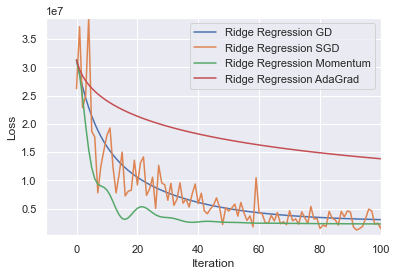

In [42]:
plt.plot(ridge_gd.loss_history, label='Ridge Regression GD')
plt.plot(ridge_sgd.loss_history, label='Ridge Regression SGD')
plt.plot(ridge_m.loss_history, label='Ridge Regression Momentum')
plt.plot(ridge_a.loss_history, label='Ridge Regression AdaGrad')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.ylim([0.5*min(min(ridge_sgd.loss_history), min(ridge_gd.loss_history), min(ridge_m.loss_history),), 
          max(max(ridge_sgd.loss_history), max(ridge_gd.loss_history), max(ridge_m.loss_history))])
plt.xlim([-10, 100])
plt.legend()
plt.show()

Все методы показывают вполне ожидаемые, и довольно хорошие результаты.

**LR2 Регрессия с *алгоритомом полного градиентного спуска*** довольно быстро сходится, показывает хороший результат.

**LR2 Регрессия с *алгоритмом стохастического градиентного спуска*** сходится не намного быстрее, однако тоже показывает довольно хороший результат. Скорее всего при работе с датасетом с большим количеством наблюдений и данными большей размерности стохастический градиентный спуск будет более явно быстрее сходится чем полный градиентный спуск.

**LR2 Регрессия c *Momentum method***  сходится быстрее всего потому что на каждой итерации алгоритм учитывает не только текущий градиент, но и предыдущие градиенты, накопленные в предыдущих итерациях. Это позволяет алгоритму сохранять импульс движения в направлении глобального минимума и ускорять движение вдоль оси, вдоль которой градиент меняется согласованно.

**LR2 Регрессия с *адаптивным градиентным спуском*** после обучения с 10000 итераций выдает хороший score, но этот метод очень медленно сходится.